In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#load the dataset
kaggle_df= pd.read_csv('/content/kaggle_layoff.csv')
kaggle_df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [ ]:
#to check the data
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


In [ ]:
#to check if there are any missing values
kaggle_df.isna().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64

In [ ]:
#to obtain general statistics of the data
kaggle_df.describe()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
count,489,489,489,489,489,489,489,489,22
unique,477,150,50,187,289,134,221,2,22
top,DataRobot,Unclear,Unclear,1/11/2023,Fintech,San Francisco,TechCrunch,Private,"Per Axios, 22 of the employees laid off were f..."
freq,2,182,133,12,24,136,52,370,1


## Data Preprocessing

In [ ]:
#dropping the additional_notes column as we do not need it
kaggle_df= kaggle_df.drop('additional_notes', axis= 1)
kaggle_df.columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'sources',
       'status'],
      dtype='object')

In [ ]:
#identifying the unique values
kaggle_df['impacted_workforce_percentage'].unique(), kaggle_df['total_layoffs'].unique()

(array(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
        '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
        '25', '26', '27', '29', '30', '32', '33', '34', '35', '37', '40',
        '42', '46', '48', '50', '60', '75', '76', '100', 'Unclear', '1',
        '28', '39', '43', '54', '70', '74'], dtype=object),
 array(['20', 'Unclear', '13', '24', '25', '26', '50', '11', '110', '12',
        '15', '150', '220', '63', '750', '100', '237', '58', '130', '35',
        '60', '68', '84', '90', '120', '30', '32', '56', '59', '85', '169',
        '70', '78', '140', '142', '21', '65', '80', '200', '123', '136',
        '156', '40', '94', '10', '124', '55', '7', '125', '16', '250',
        '45', '47', '5', '54', '450', '170', '27', '104', '43', '254',
        '260', '57', '640', '67', '76', '23', '37', '72', '74', '950',
        '378', '1100', '162', '173', '33', '44', '158', '262', '64',
        '5000', '111', '88', '1000', '101', '400', '14', '1050', '10

In [ ]:
#drop columns with the value "Unclear"
kaggle_df = kaggle_df.query('total_layoffs != "Unclear"')
kaggle_df = kaggle_df.query('impacted_workforce_percentage != "Unclear"')
kaggle_df['impacted_workforce_percentage'].unique(), kaggle_df['total_layoffs'].unique()

(array(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
        '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
        '25', '27', '29', '30', '32', '33', '34', '35', '40', '42', '46',
        '48', '50', '60', '75', '76', '100', '1', '37', '39', '43', '70'],
       dtype=object),
 array(['20', '13', '24', '25', '26', '50', '11', '110', '12', '15', '150',
        '220', '63', '750', '100', '237', '58', '130', '35', '60', '68',
        '84', '90', '120', '30', '32', '56', '59', '85', '169', '70', '78',
        '140', '142', '21', '65', '80', '200', '123', '136', '156', '40',
        '94', '10', '124', '55', '7', '125', '16', '250', '45', '47', '5',
        '54', '450', '170', '27', '104', '43', '254', '260', '57', '640',
        '67', '76', '23', '37', '72', '74', '950', '378', '1100', '162',
        '173', '33', '44', '158', '262', '64', '5000', '111', '88', '1000',
        '101', '400', '38', '700', '270', '18000', '300', '350', '4100',
        '95',

In [ ]:
#determining the number of rows left in the kaggle dataset
kaggle_df.count()

company                          240
total_layoffs                    240
impacted_workforce_percentage    240
reported_date                    240
industry                         240
headquarter_location             240
sources                          240
status                           240
dtype: int64

In [ ]:
#converting the columns into their respective data types
kaggle_df['total_layoffs']= kaggle_df['total_layoffs'].astype(int)
kaggle_df['impacted_workforce_percentage']= kaggle_df['impacted_workforce_percentage'].astype(int)
kaggle_df['reported_date'] = pd.to_datetime(kaggle_df['reported_date'])
kaggle_df.dtypes

company                                  object
total_layoffs                             int64
impacted_workforce_percentage             int64
reported_date                    datetime64[ns]
industry                                 object
headquarter_location                     object
sources                                  object
status                                   object
dtype: object

In [ ]:
#loading the second dataset
lyi_layoff= pd.read_csv('/content/lyi_layoff.csv')
lyi_layoff.head()

,Company,Location HQ,# Laid Off,Date,%,Industry,Status
0,Grubhub,SF Bay Area,400.0,6/12/2023,15%,Food,Acquired
1,Pendo,Raleigh,100.0,6/12/2023,NaN,Product,Series F
2,GoCardless,London,NaN,6/12/2023,15%,Finance,Series G
3,TaxBit,SF Bay Area,80.0,6/11/2023,40%,Crypto,Unknown
4,Trybe,Sao Paulo,128.0,6/9/2023,35%,Education,Series B


In [ ]:
# basic overview of data
lyi_layoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      2434 non-null   object 
 1   Location HQ  2434 non-null   object 
 2   # Laid Off   1649 non-null   float64
 3   Date         2433 non-null   object 
 4   %            1624 non-null   object 
 5   Industry     2433 non-null   object 
 6   Status       2420 non-null   object 
dtypes: float64(1), object(6)
memory usage: 133.6+ KB


In [ ]:
#general statistics
lyi_layoff.describe(include = 'all')

,Company,Location HQ,# Laid Off,Date,%,Industry,Status
count,2434,2434,1649.00000,2433,1624,2433,2420
unique,1928,208,NaN,546,69,30,36
top,OYO,SF Bay Area,NaN,1/18/2023,10%,Finance,Post-IPO
freq,5,622,NaN,24,156,315,472
mean,NaN,NaN,266.56701,NaN,NaN,NaN,NaN
std,NaN,NaN,864.60181,NaN,NaN,NaN,NaN
min,NaN,NaN,3.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,40.00000,NaN,NaN,NaN,NaN
50%,NaN,NaN,81.00000,NaN,NaN,NaN,NaN
75%,NaN,NaN,191.00000,NaN,NaN,NaN,NaN


In [ ]:
#check if there are any missing values
lyi_layoff.isna().sum()

Company          6
Location HQ      6
# Laid Off     791
Date             7
%              816
Industry         7
Status          20
dtype: int64

In [ ]:
#to determine the total rows
lyi_layoff.count()

Company        2434
Location HQ    2434
# Laid Off     1649
Date           2433
%              1624
Industry       2433
Status         2420
dtype: int64

In [ ]:
#dropping off null values
lyi_layoff= lyi_layoff.dropna(axis= 0)
lyi_layoff.isna().sum()

Company        0
Location HQ    0
# Laid Off     0
Date           0
%              0
Industry       0
Status         0
dtype: int64

In [ ]:
#to determine the remaining rows
lyi_layoff.count()

Company        1204
Location HQ    1204
# Laid Off     1204
Date           1204
%              1204
Industry       1204
Status         1204
dtype: int64

In [ ]:
# Convert columns into their respective data types
lyi_layoff['# Laid Off'] = lyi_layoff['# Laid Off'].astype(int)
lyi_layoff['%'] = lyi_layoff['%'].str.rstrip('%').astype(int)  # Remove '%' character before conversion
lyi_layoff['Date'] = pd.to_datetime(lyi_layoff['Date'])
lyi_layoff.dtypes

Company                object
Location HQ            object
# Laid Off              int64
Date           datetime64[ns]
%                       int64
Industry               object
Status                 object
dtype: object

In [ ]:
#to change the column names to be similar for both datasets
new_columns= ['company', 'headquarter_location', 'total_layoffs', 'reported_date',
              'impacted_workforce_percentage', 'industry','status']
lyi_layoff.columns= new_columns
lyi_layoff.columns

Index(['company', 'headquarter_location', 'total_layoffs', 'reported_date',
       'impacted_workforce_percentage', 'industry', 'status'],
      dtype='object')

In [ ]:
#to merge the datasets into one
combined_layoff= pd.concat([kaggle_df, lyi_layoff], axis=0)
combined_layoff

#merge1=pd.merge(kaggle_df,lyi_layoff,on= ['company', 'headquarter_location', 'total_layoffs', 'reported_date','impacted_workforce_percentage', 'industry', 'status'],  how ='inner')
#merge1.head(3)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Axios,Private
6,Armis Security,25,4,2022-12-08,Cybersecurity,San Francisco,Calcalistech,Private
...,...,...,...,...,...,...,...,...
2414,Crayon,20,20,2020-04-01,Marketing,Boston,NaN,Series D
2415,Sensibill,17,20,2020-04-01,Finance,Toronto,NaN,Unknown
2437,GrayMeta,20,40,2020-03-23,Data,Los Angeles,NaN,Post-IPO
2438,Triplebyte,15,17,2020-03-23,Recruiting,SF Bay Area,NaN,Series D


In [ ]:
#Dropping of Sources column as it is irrelevant for analysis

combined_layoff= combined_layoff.drop('sources', axis=1)
combined_layoff

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Private
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Private
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Private
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Private
6,Armis Security,25,4,2022-12-08,Cybersecurity,San Francisco,Private
...,...,...,...,...,...,...,...
2414,Crayon,20,20,2020-04-01,Marketing,Boston,Series D
2415,Sensibill,17,20,2020-04-01,Finance,Toronto,Unknown
2437,GrayMeta,20,40,2020-03-23,Data,Los Angeles,Post-IPO
2438,Triplebyte,15,17,2020-03-23,Recruiting,SF Bay Area,Series D


In [ ]:
#to extract the month from the reported_date column
combined_layoff['month']= combined_layoff['reported_date'].dt.month
combined_layoff

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status,month
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Private,12
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Private,8
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Private,1
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Private,5
6,Armis Security,25,4,2022-12-08,Cybersecurity,San Francisco,Private,12
...,...,...,...,...,...,...,...,...
2414,Crayon,20,20,2020-04-01,Marketing,Boston,Series D,4
2415,Sensibill,17,20,2020-04-01,Finance,Toronto,Unknown,4
2437,GrayMeta,20,40,2020-03-23,Data,Los Angeles,Post-IPO,3
2438,Triplebyte,15,17,2020-03-23,Recruiting,SF Bay Area,Series D,3


In [ ]:
#reviewing the dataset
combined_layoff.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status,month
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Private,12
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Private,8
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Private,1
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Private,5
6,Armis Security,25,4,2022-12-08,Cybersecurity,San Francisco,Private,12


In [ ]:
#Created a new column 'Year'
combined_layoff['year'] = combined_layoff['reported_date'].dt.year

In [ ]:
#Reviewing the dataset
combined_layoff.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status,month,year
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Private,12,2022
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Private,8,2022
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Private,1,2023
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Private,5,2022
6,Armis Security,25,4,2022-12-08,Cybersecurity,San Francisco,Private,12,2022


In [ ]:
#Getting top and bottom five layed offs

top_5_layoffs_industries = combined_layoff.groupby('industry')['total_layoffs'].sum().sort_values(ascending = False).head()
bottom_5_layoffs_industries = combined_layoff.groupby('industry')['total_layoffs'].sum().sort_values(ascending = True).head()

In [ ]:
#Industries with the most layoffs

top_5_layoffs_industries

industry
Retail            41774
Consumer          38404
Other             36722
Transportation    31037
Finance           26413
Name: total_layoffs, dtype: int64

In [ ]:
#Industries with the least layoffs

bottom_5_layoffs_industries

industry
Artificial intelligence, recruiting     5
Privacy Tech, Marketing Tech            7
Beauty tech                            11
Media, Content Creators                13
Saas, analytics                        13
Name: total_layoffs, dtype: int64

In [ ]:
#Removing extra spaces from values in the status column

combined_layoff['status'] = combined_layoff['status'].apply(lambda x: x.strip())

In [ ]:
#Reviewing the status column

combined_layoff['status'].value_counts()

Post-IPO      261
Private       196
Unknown       186
Series B      150
Series C      132
Series D      129
Acquired       94
Series A       77
Public         68
Series E       57
Series F       34
Seed           28
Series H       13
Series G        7
Subsidiary      4
Series I        3
Series J        3
Germany         1
mark            1
Name: status, dtype: int64

In [ ]:
#From research Series A to G companies are regarded as Private companies and Post-IPO is regarded as Public companies

# Replace values with 'Private'
combined_layoff['status'] = combined_layoff['status'].replace(['Private', 'Series B', 'Series C', 'Series D', 'Series A', 'Series E','Series F', 'Seed', 'Series H', 'Series G', 'Series I', 'Series J'], 'Private')

# Replace 'Post-IPO' and 'Public' with 'Public'
combined_layoff['status'].replace(['Post-IPO', 'Public'], 'Public', inplace=True)


In [ ]:
#Checking for unique values in the status columns

combined_layoff['status'].value_counts()

#It is seen that the mark and Germany values in the status column are errors therefore it has to be dropped

Private       829
Public        329
Unknown       186
Acquired       94
Subsidiary      4
Germany         1
mark            1
Name: status, dtype: int64

In [ ]:
#Dropping the Germany and mark in the status column

combined_layoff.drop(combined_layoff[combined_layoff['status'] == 'Germany'].index, inplace = True)
combined_layoff.drop(combined_layoff[combined_layoff['status'] == 'mark'].index, inplace = True)

In [ ]:
#Checking for unique values in the status column

combined_layoff['status'].value_counts()

Private       829
Public        329
Unknown       186
Acquired       94
Subsidiary      4
Name: status, dtype: int64

In [ ]:
#Converting Year to obtect type

combined_layoff['year'] = combined_layoff['year'].astype(str)

In [ ]:
#Checking info of my dataset

combined_layoff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 2439
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        1442 non-null   object        
 1   total_layoffs                  1442 non-null   int64         
 2   impacted_workforce_percentage  1442 non-null   int64         
 3   reported_date                  1442 non-null   datetime64[ns]
 4   industry                       1442 non-null   object        
 5   headquarter_location           1442 non-null   object        
 6   status                         1442 non-null   object        
 7   month                          1442 non-null   int64         
 8   year                           1442 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 112.7+ KB


# Visualizing Of Data

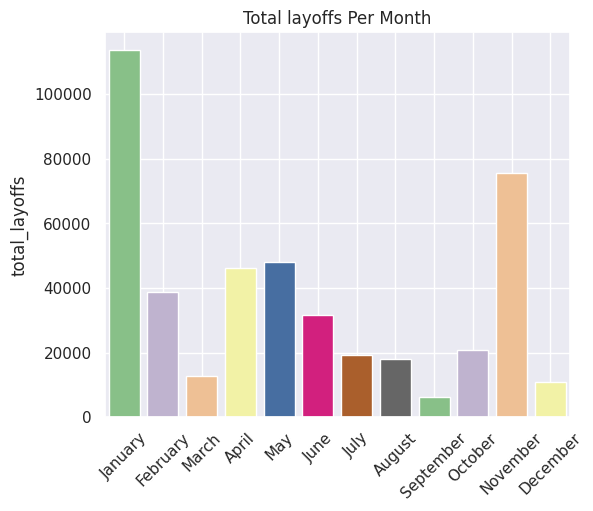

In [ ]:
#Visualizing the total number of layoffs on a monthly basis

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.set(style="darkgrid")
order_month = combined_layoff.groupby(by=['month'], as_index = False)['total_layoffs'].sum()
mon = order_month.index
plt.figure(figsize=(6,5))
sns.barplot(x = mon , y = 'total_layoffs', data = order_month,  palette= "Accent")
plt.grid(True)
plt.title('Total layoffs Per Month')
plt.xticks(mon, month_names, rotation = 45)
plt.show()

#It is seen that January is the month with most layoffs

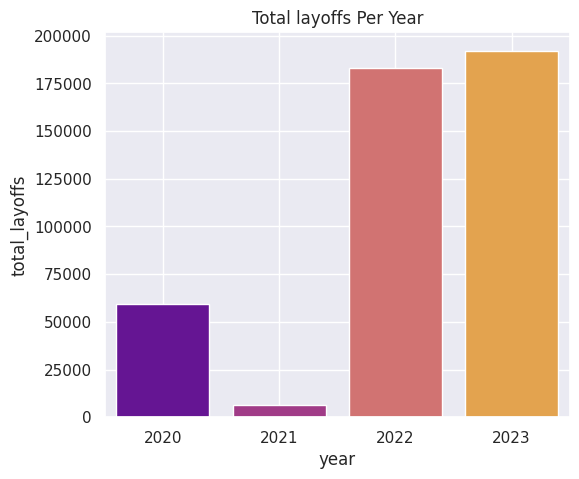

In [ ]:
#Grouping by year to get the layoffs per year
sns.set(style="darkgrid")
order_year = combined_layoff.groupby(by=['year'], as_index = False)['total_layoffs'].sum()
plt.figure(figsize=(6,5))
sns.barplot(x = "year", y = 'total_layoffs', data = order_year,  palette= "plasma")
plt.grid(True)
plt.title('Total layoffs Per Year')
plt.show()

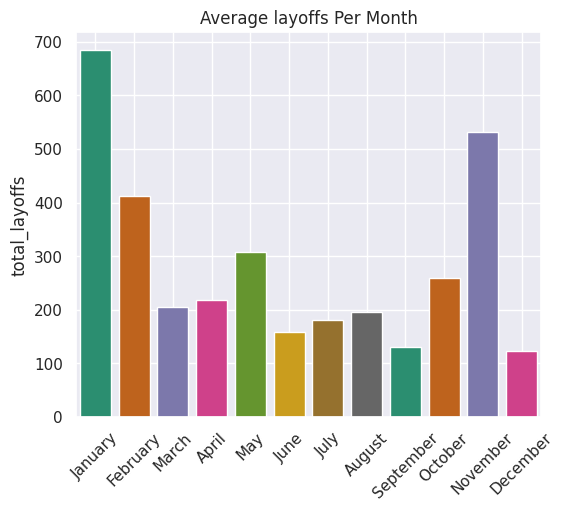

In [ ]:
#Visualizing Average Number of Laid Off staffs per Months

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.set(style="darkgrid")
order_month2 = combined_layoff.groupby(by=['month'], as_index = False)['total_layoffs'].mean()
mont = order_month2.index
plt.figure(figsize=(6,5))
sns.barplot(x = mont , y = 'total_layoffs', data = order_month2,  palette= "Dark2")
plt.grid(True)
plt.title('Average layoffs Per Month')
plt.xticks(mont, month_names, rotation = 45)
plt.show()

#THerefore it is seen from the diagram above that January is the month with the most average layoffs

In [ ]:
#Checking the datasets info
combined_layoff.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status,month,year
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Private,12,2022
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Private,8,2022
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Private,1,2023
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Private,5,2022
6,Armis Security,25,4,2022-12-08,Cybersecurity,San Francisco,Private,12,2022


Text(0.5, 1.0, 'Top 5 Industries with most layoffs')

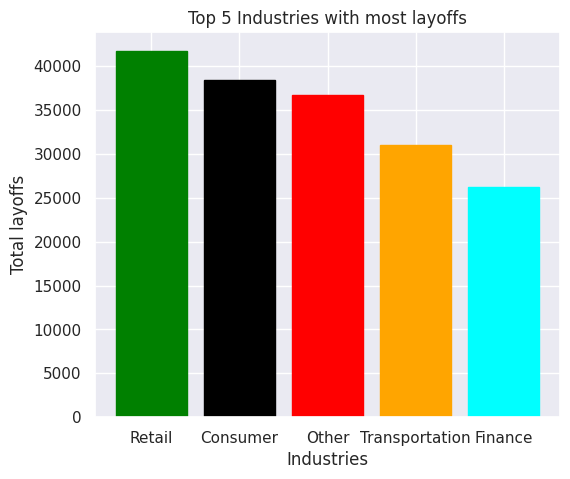

In [ ]:
#Grouping by the top 5 Industries with most layoffs
total_layoff_per_industry =combined_layoff.groupby('industry')['total_layoffs'].sum().sort_values(ascending=False).head()
ind = total_layoff_per_industry.index
ind_total = total_layoff_per_industry
plt.figure(figsize=(6,5))
bars = plt.bar(ind, ind_total)
bars[0].set_color('green')
bars[1].set_color('black')
bars[2].set_color('red')
bars[3].set_color('orange')
bars[4].set_color('cyan')
plt.grid(True)
plt.xlabel('Industries')
plt.ylabel('Total layoffs')
plt.title('Top 5 Industries with most layoffs')

Text(0.5, 1.0, 'Top 5 Industries with the least layoffs')

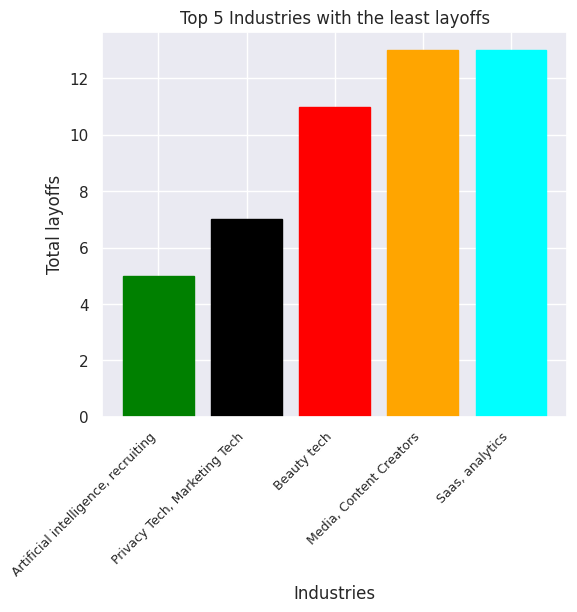

In [ ]:
#Grouping by the top 5 Industries with the least layoffs
total_layoff_per_industry1 =combined_layoff.groupby('industry')['total_layoffs'].sum().sort_values(ascending=True).head()
ind1 = total_layoff_per_industry1.index
ind_total1 = total_layoff_per_industry1
plt.figure(figsize=(6,5))
bars = plt.bar(ind1, ind_total1)
bars[0].set_color('green')
bars[1].set_color('black')
bars[2].set_color('red')
bars[3].set_color('orange')
bars[4].set_color('cyan')
plt.grid(True)
plt.xticks(rotation = 45, ha= 'right', fontsize = 9)
plt.xlabel('Industries')
plt.ylabel('Total layoffs')
plt.title('Top 5 Industries with the least layoffs')

<ipython-input-43-0ceb9efebb31>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_plot = combined_layoff.corr()


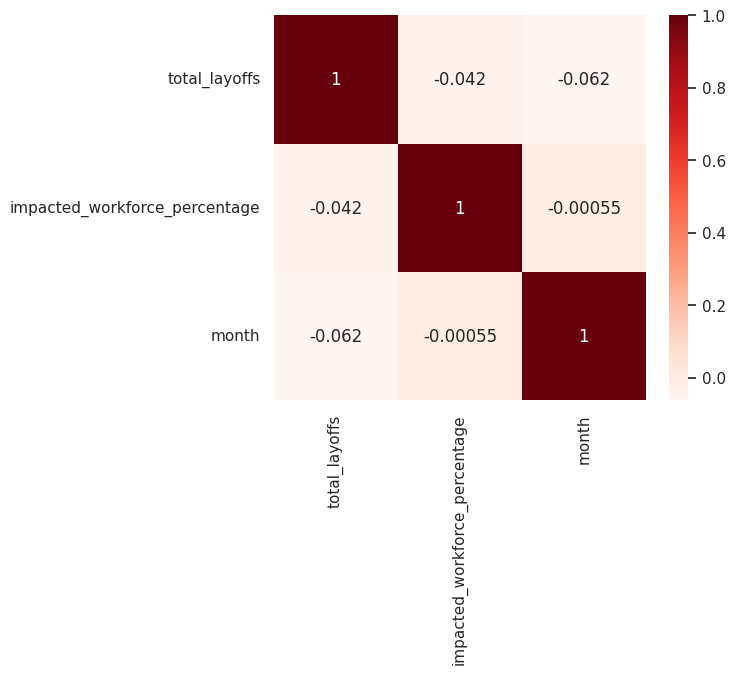

In [ ]:
#Checking for the correlation

plt.figure(figsize=(6,5))
corr_plot = combined_layoff.corr()
sns.heatmap(corr_plot, annot=True,  cmap=plt.cm.Reds)
plt.show()

#There is absolutely no correlation between any of the 3 columns

Text(0.5, 1.0, 'Company status With the most Layoffs')

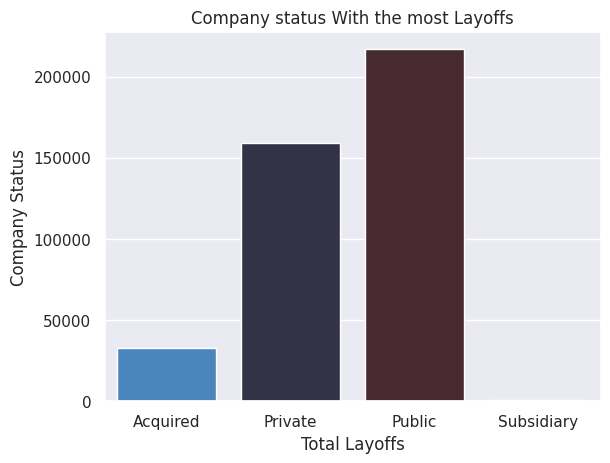

In [ ]:
#Company Status with the highest layoffs

#The unknown values in the status columns are neglected for visualizations
known_status = combined_layoff[combined_layoff['status'] != 'Unknown']
status_totallay = known_status.groupby('status')['total_layoffs'].sum()
stat = status_totallay.index
total_sts = status_totallay.values

sns.set(style="darkgrid")
sns.barplot(x = stat, y= total_sts, palette = 'icefire')
plt.xlabel('Total Layoffs')
plt.ylabel('Company Status')
plt.title('Company status With the most Layoffs')

#Private owned companies are most likely to layoff their staffs than public companies